In [2]:
# show istograms, cake diagram and correlation
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.options.display.max_rows = 1000

data = pd.read_csv(r'card_transdata_preprocessed.csv')
# data.head() # show only first rows
display(data)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0


In [ ]:
# describe dataset: we drop binary attributes before describe function
# beacause no sense make mean, std, min.... with 0/1 attributes () -> original data doesn't change number of attributes
data.drop(['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud'], axis=1).describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182
std,65.390784,25.843093,2.799589
min,0.004874,0.000118,0.004399
25%,3.878008,0.296671,0.475673
50%,9.967760,0.998650,0.997717
75%,25.743985,3.355748,2.096370
max,10632.723672,11851.104565,267.802942


/var/folders/k8/b6lhrl0x45g7kg3gtvt0n1240000gn/T/ipykernel_40466/3763569355.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['distance_from_home'],kde=False)
/var/folders/k8/b6lhrl0x45g7kg3gtvt0n1240000gn/T/ipykernel_40466/3763569355.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d

Text(0, 0.5, 'Count')

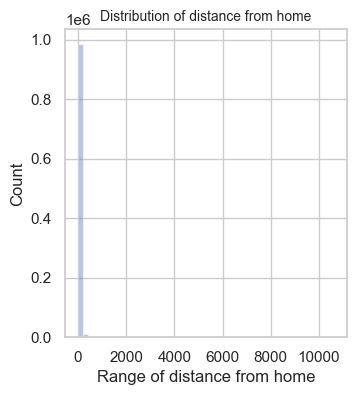

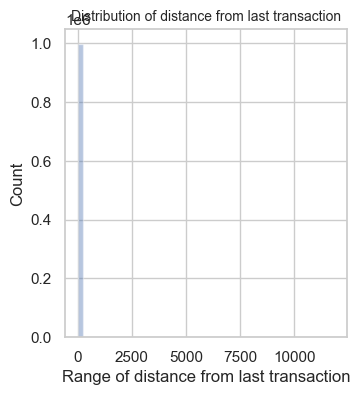

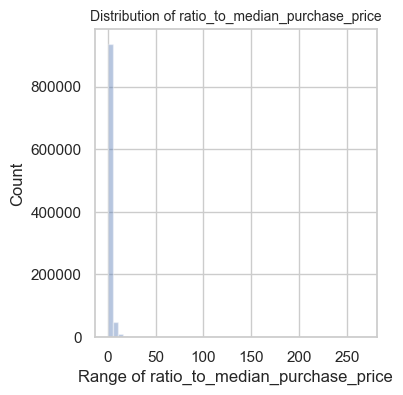

In [ ]:
# plot distribution of "distance_from_home" -> most transactions are near home
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.set(style = 'whitegrid')
sns.distplot(data['distance_from_home'],kde=False)
plt.title('Distribution of distance from home', size=10)
plt.xlabel('Range of distance from home')
plt.ylabel('Count')

# plot distribution of "distance_from_last_transaction" -> most transactions are near last transaction
plt.figure(figsize=(8,4))
plt.subplot(1,2,2)
sns.set(style = 'whitegrid')
sns.distplot(data['distance_from_last_transaction'],kde=False)
plt.title('Distribution of distance from last transaction', size=10)
plt.xlabel('Range of distance from last transaction')
plt.ylabel('Count')

# plot distribution of "ratio_to_median_purchase_price" -> ???
plt.figure(figsize=(8,4))
plt.subplot(1,2,2)
sns.set(style = 'whitegrid')
sns.distplot(data['ratio_to_median_purchase_price'],kde=False)
plt.title('Distribution of ratio_to_median_purchase_price', size=10)
plt.xlabel('Range of ratio_to_median_purchase_price')
plt.ylabel('Count')

1    881536
0    118464
Name: repeat_retailer, dtype: int64


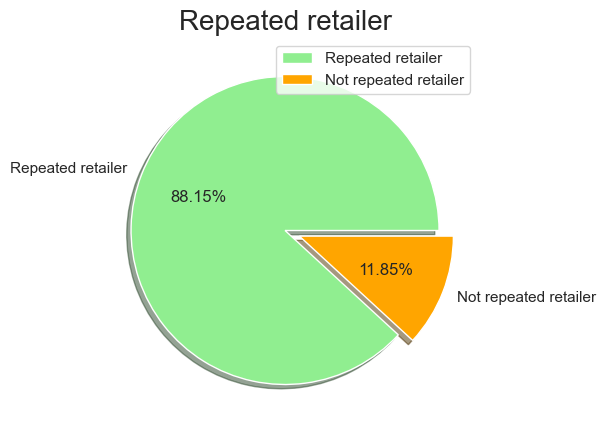

0    649601
1    350399
Name: used_chip, dtype: int64


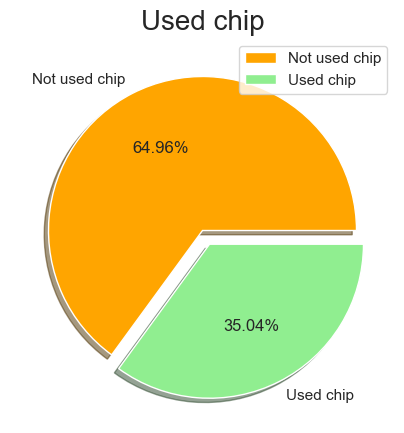

0    899392
1    100608
Name: used_pin_number, dtype: int64


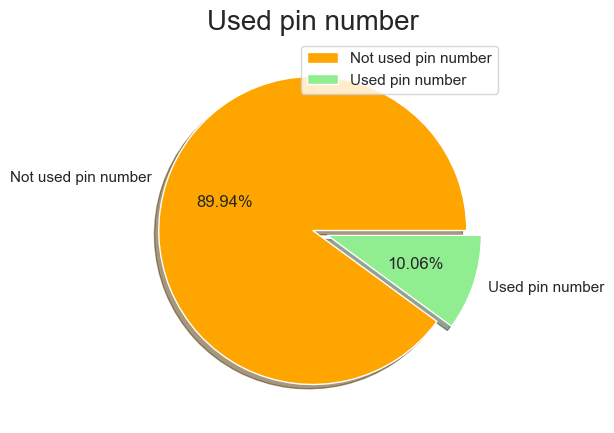

1    650552
0    349448
Name: online_order, dtype: int64


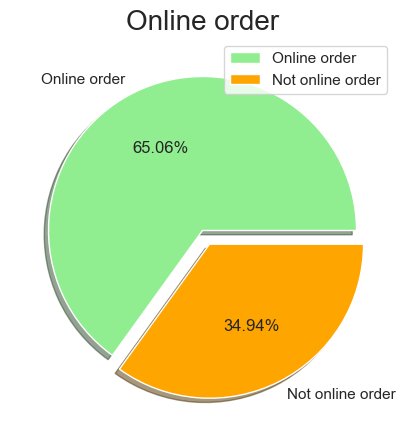

0    912597
1     87403
Name: fraud, dtype: int64


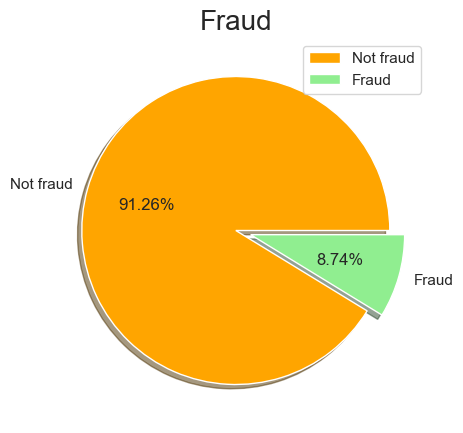

In [ ]:
# describe binary attributes 
# repeat_retailer'
print(data['repeat_retailer'].value_counts()) # -> most transactions in place where they bought yet
labels = ['Repeated retailer', 'Not repeated retailer'] # 1 repeat, 0 not repeat
size = data['repeat_retailer'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.figure(figsize=(5,5))
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Repeated retailer', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

# used_chip
print(data['used_chip'].value_counts()) #  -> most transactions used chip
labels = ['Not used chip', 'Used chip'] # 1 chip used, 0 not chip used
size = data['used_chip'].value_counts()
colors = [ 'orange','lightgreen']
explode = [0, 0.1]

plt.figure(figsize=(5,5))
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Used chip', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

# used_pin_number
print(data['used_pin_number'].value_counts()) # -> most transactions required pin number
labels = ['Not used pin number', 'Used pin number'] # 1 pin used, 0 not pin used
size = data['used_pin_number'].value_counts()
colors = ['orange', 'lightgreen']
explode = [0, 0.1]

plt.figure(figsize=(5,5))
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Used pin number', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

# online_order
print(data['online_order'].value_counts()) #  -> 2/3 of most transactions are online orders
labels = ['Online order', 'Not online order'] # 1 online, 0 not online
size = data['online_order'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.figure(figsize=(5,5))
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Online order', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

# fraud
print(data['fraud'].value_counts()) # -> 90% are genuine transactions, 10% are fraud
labels = ['Not fraud', 'Fraud'] # 1 fraud, 0 not fraud
size = data['fraud'].value_counts()
colors = ['orange', 'lightgreen']
explode = [0, 0.1]

plt.figure(figsize=(5,5))
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Fraud', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

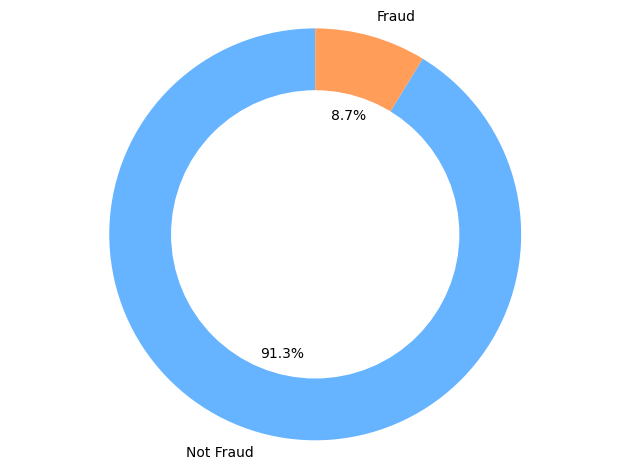

In [31]:
# fraud
"""
print(data['fraud'].value_counts()) # -> 90% are genuine transactions, 10% are fraud
labels = ['Not fraud', 'Fraud'] # 1 fraud, 0 not fraud
size = data['fraud'].value_counts()
colors = ['orange', 'lightgreen']
explode = [0, 0.1]

plt.figure(figsize=(5,5))
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.title('Fraud', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

"""



# Pie chart
labels = ['Not Fraud', 'Fraud']

#colors
colors = ['#66b3ff','#ff9d59']

# size
size = data['fraud'].value_counts()

#plot 
fig1, ax1 = plt.subplots()
ax1.pie(size, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

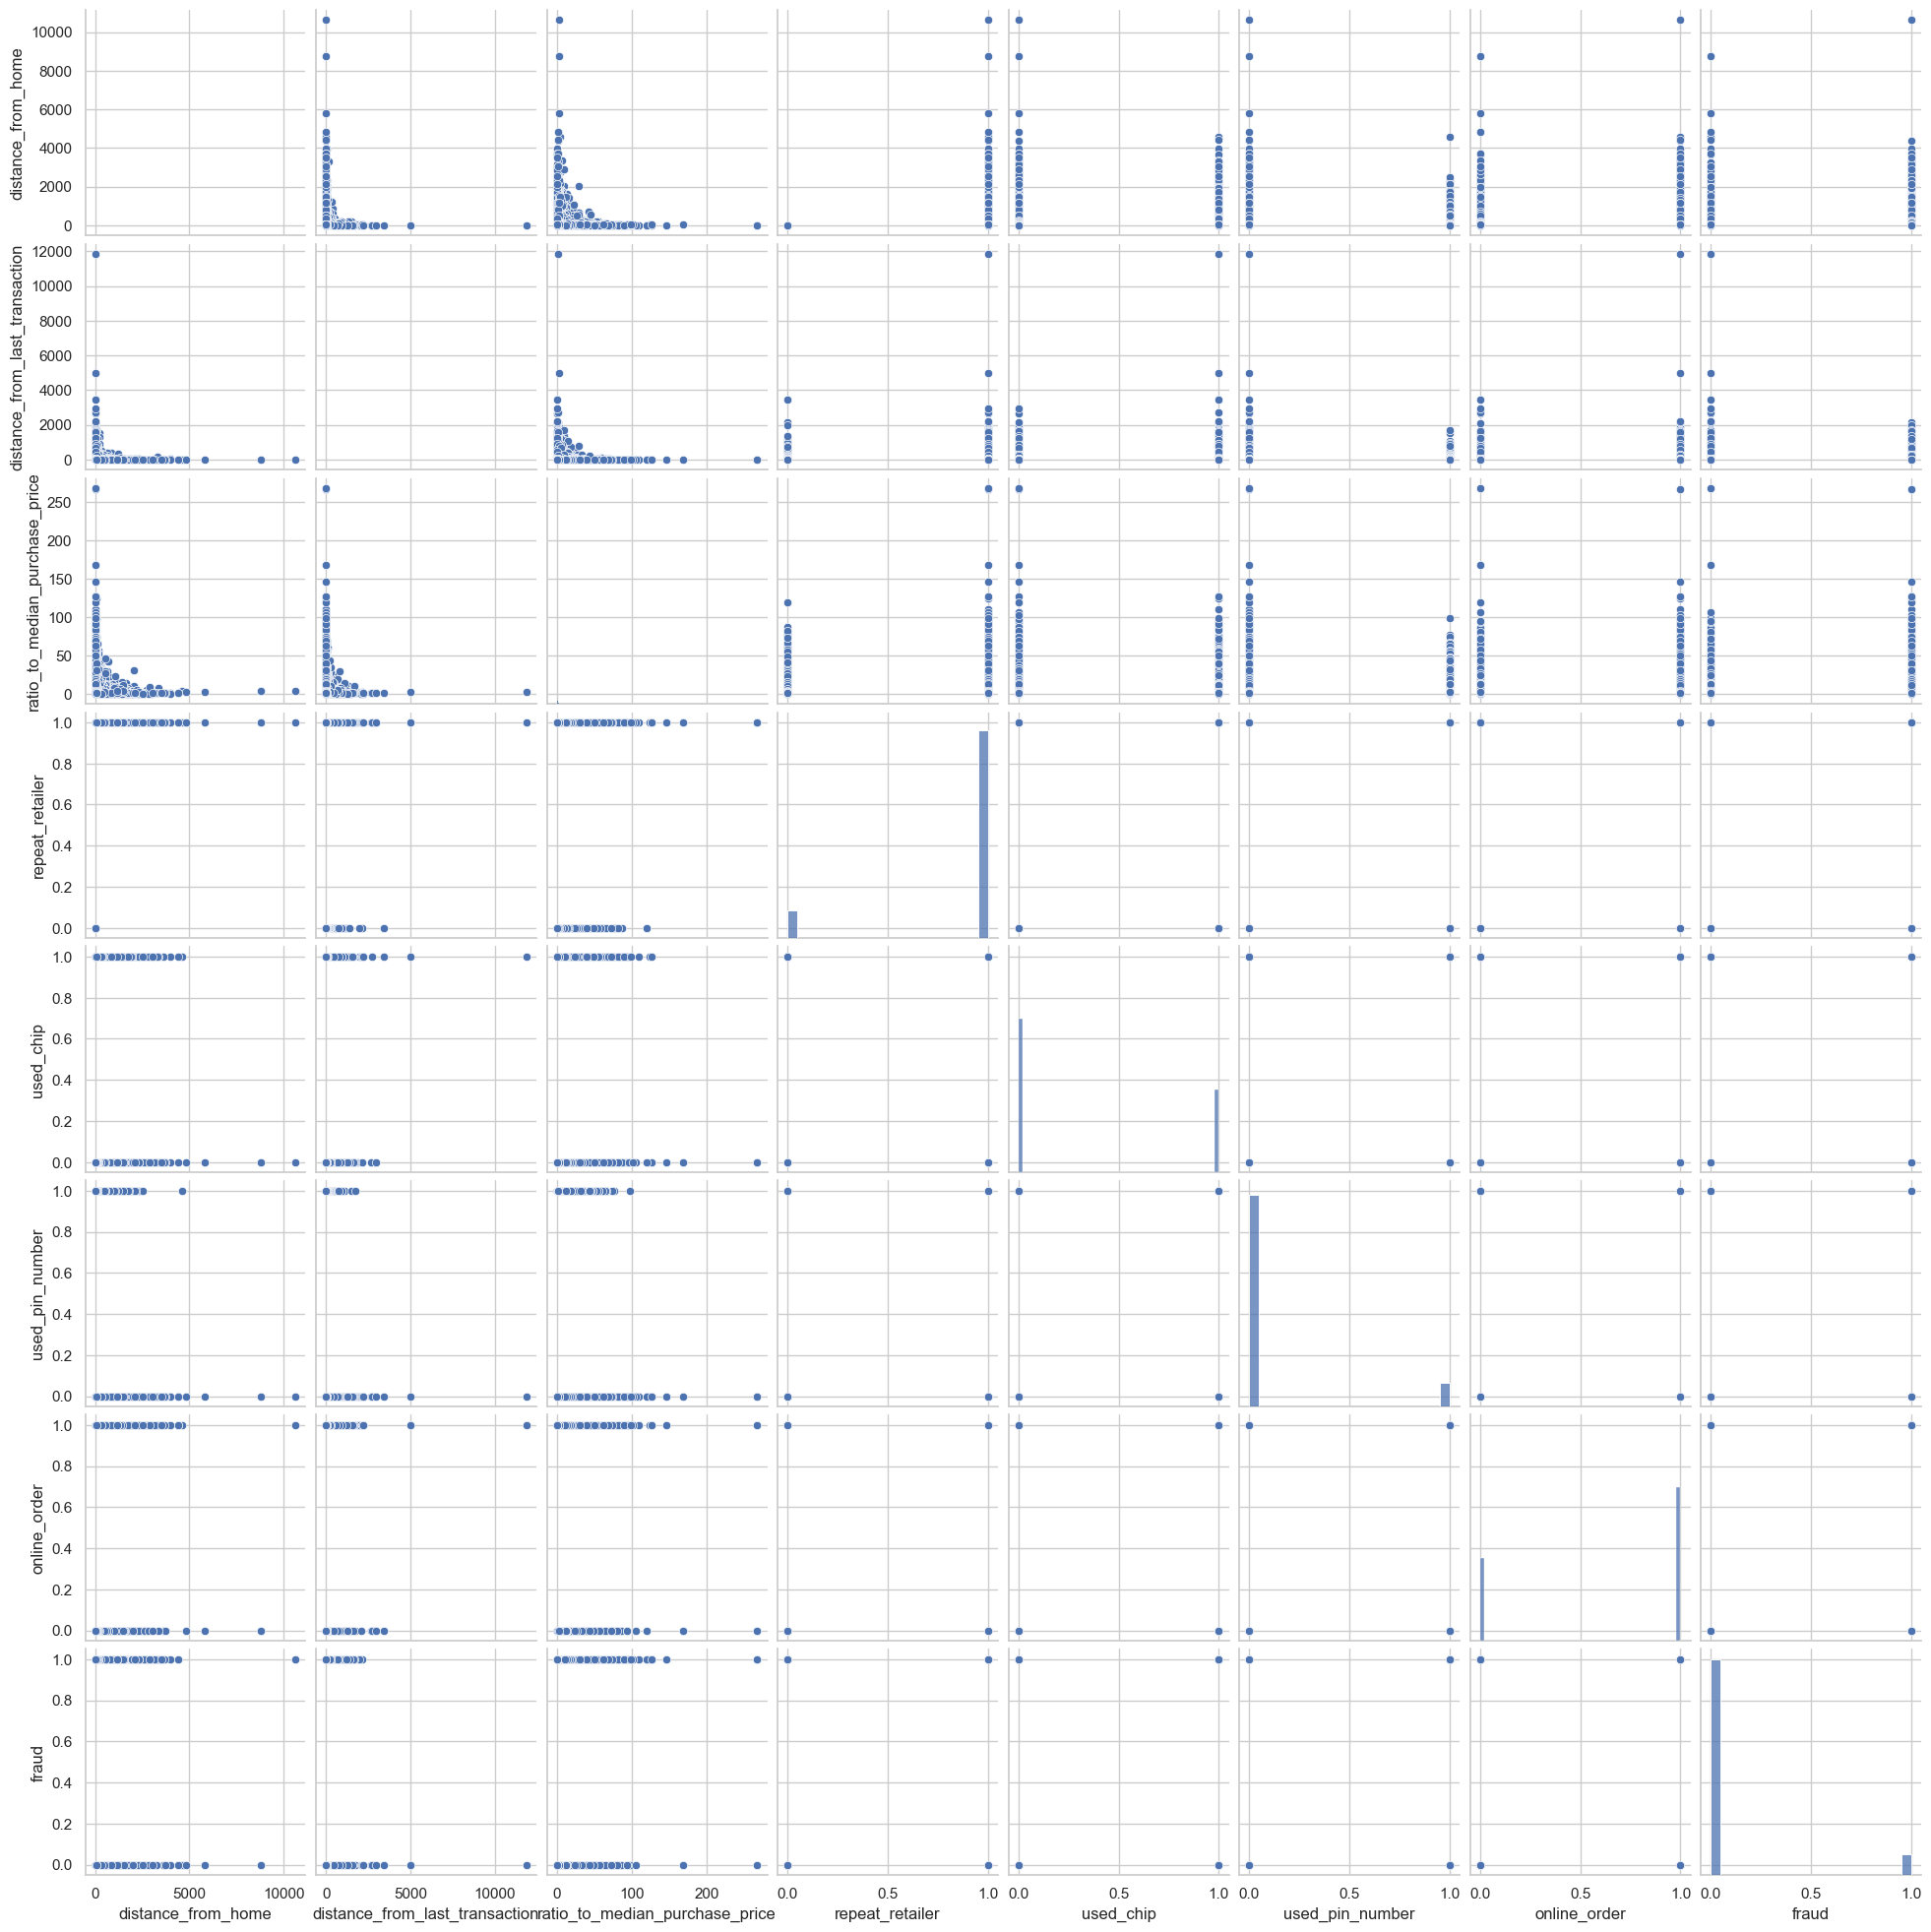

In [ ]:
sns.pairplot(data)

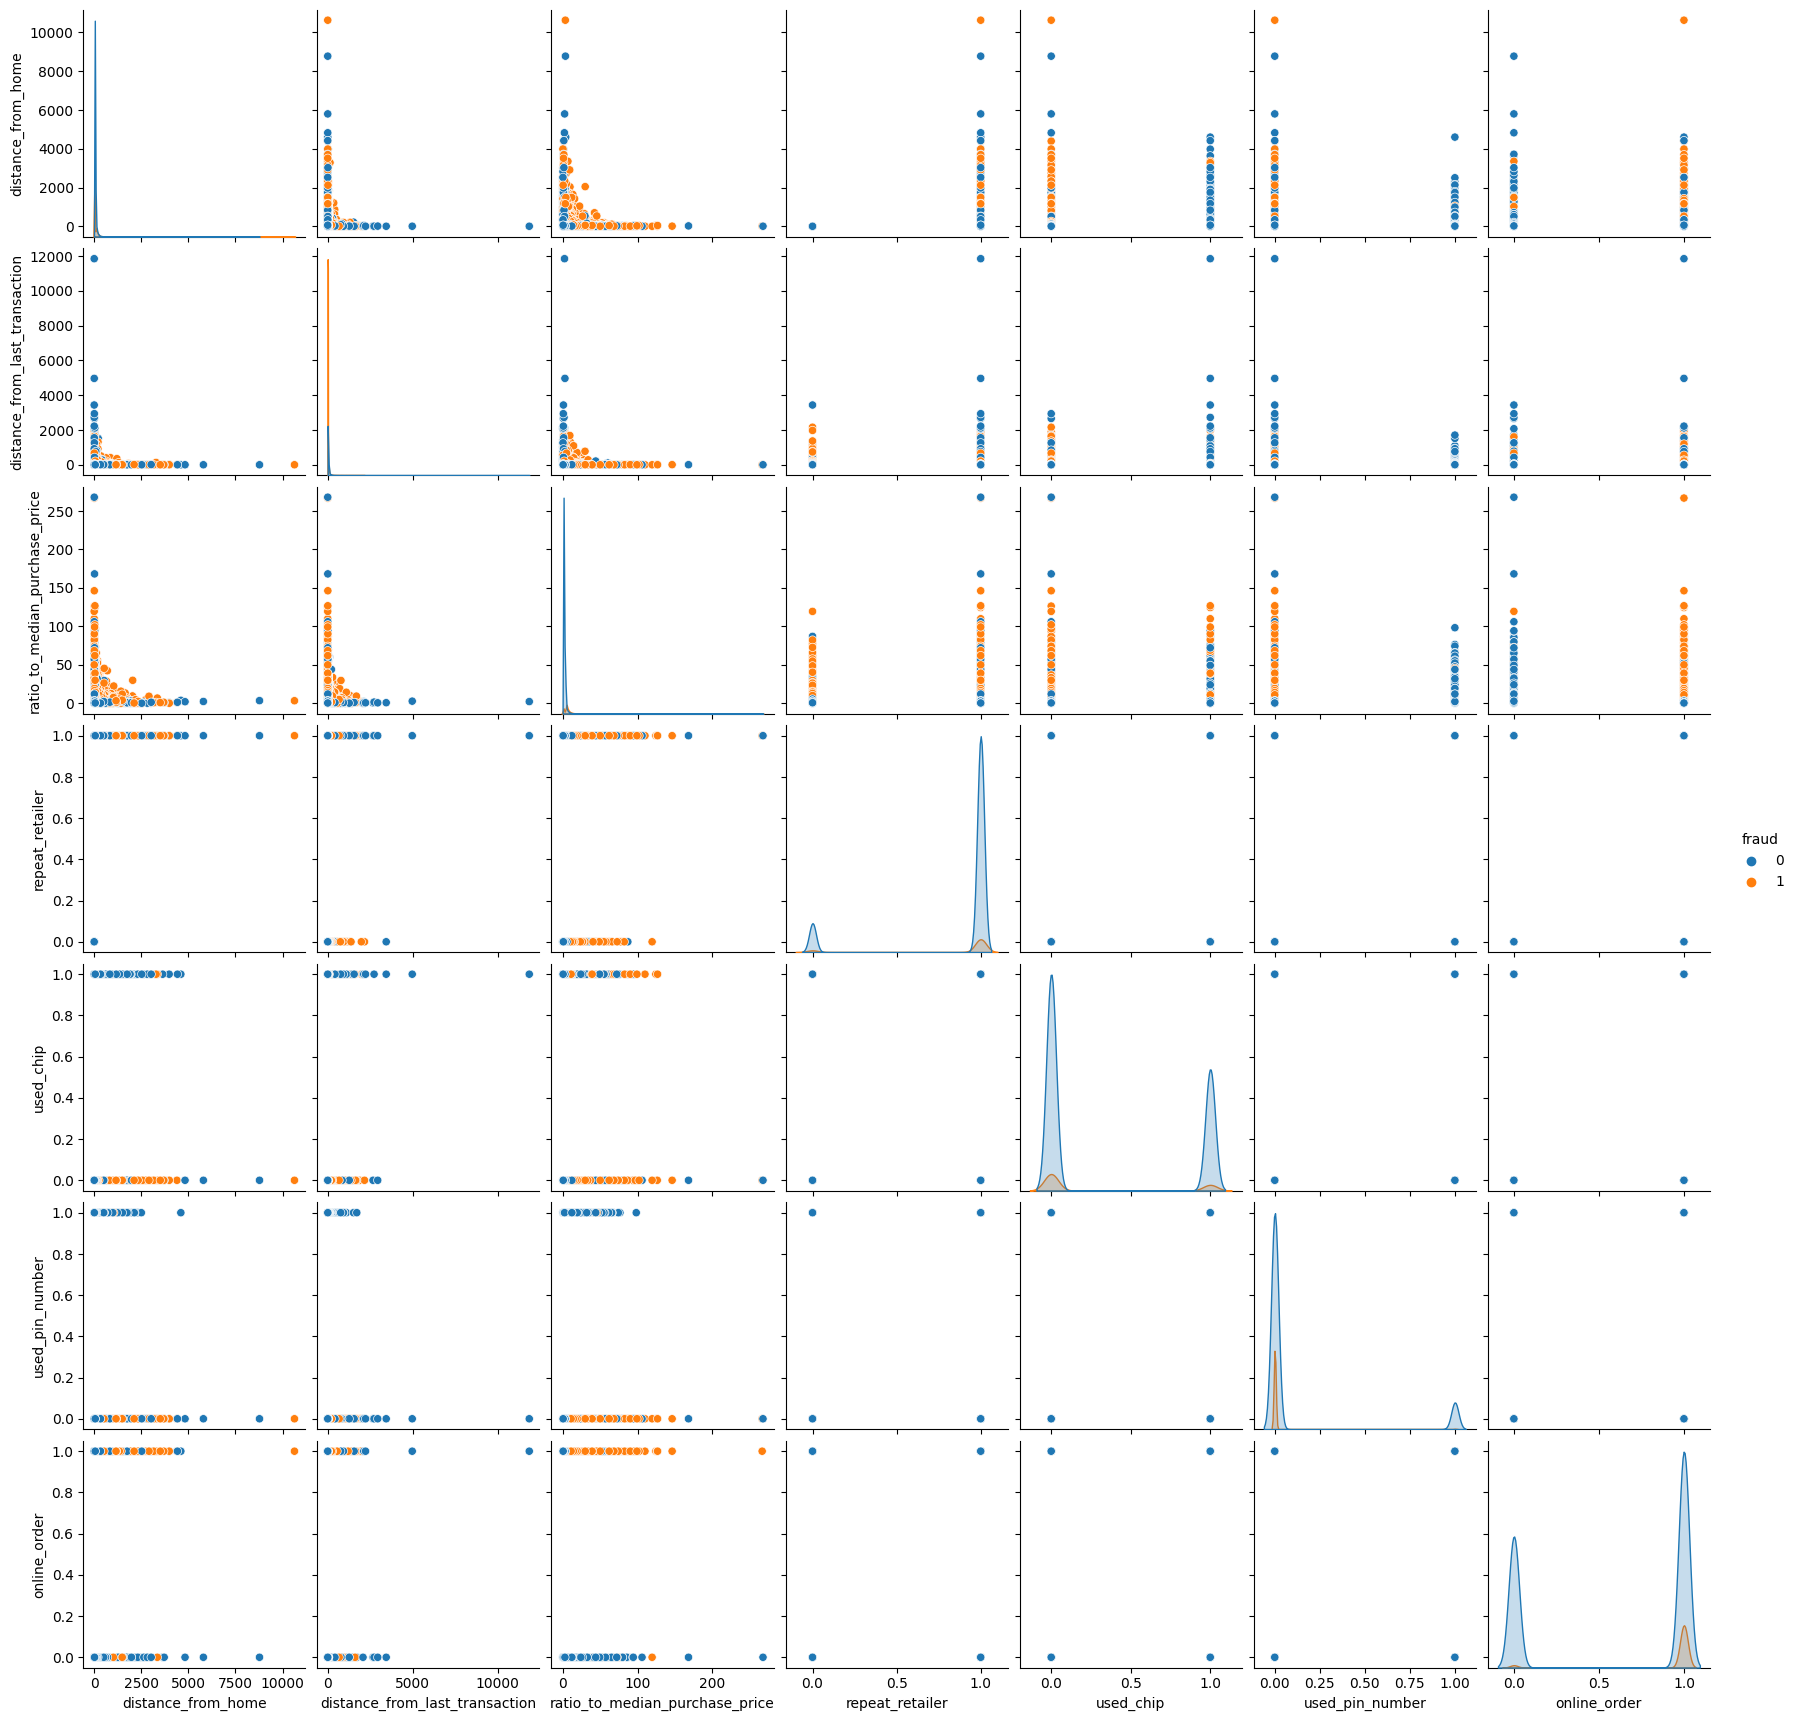

In [4]:

sns.pairplot(data, hue="fraud")


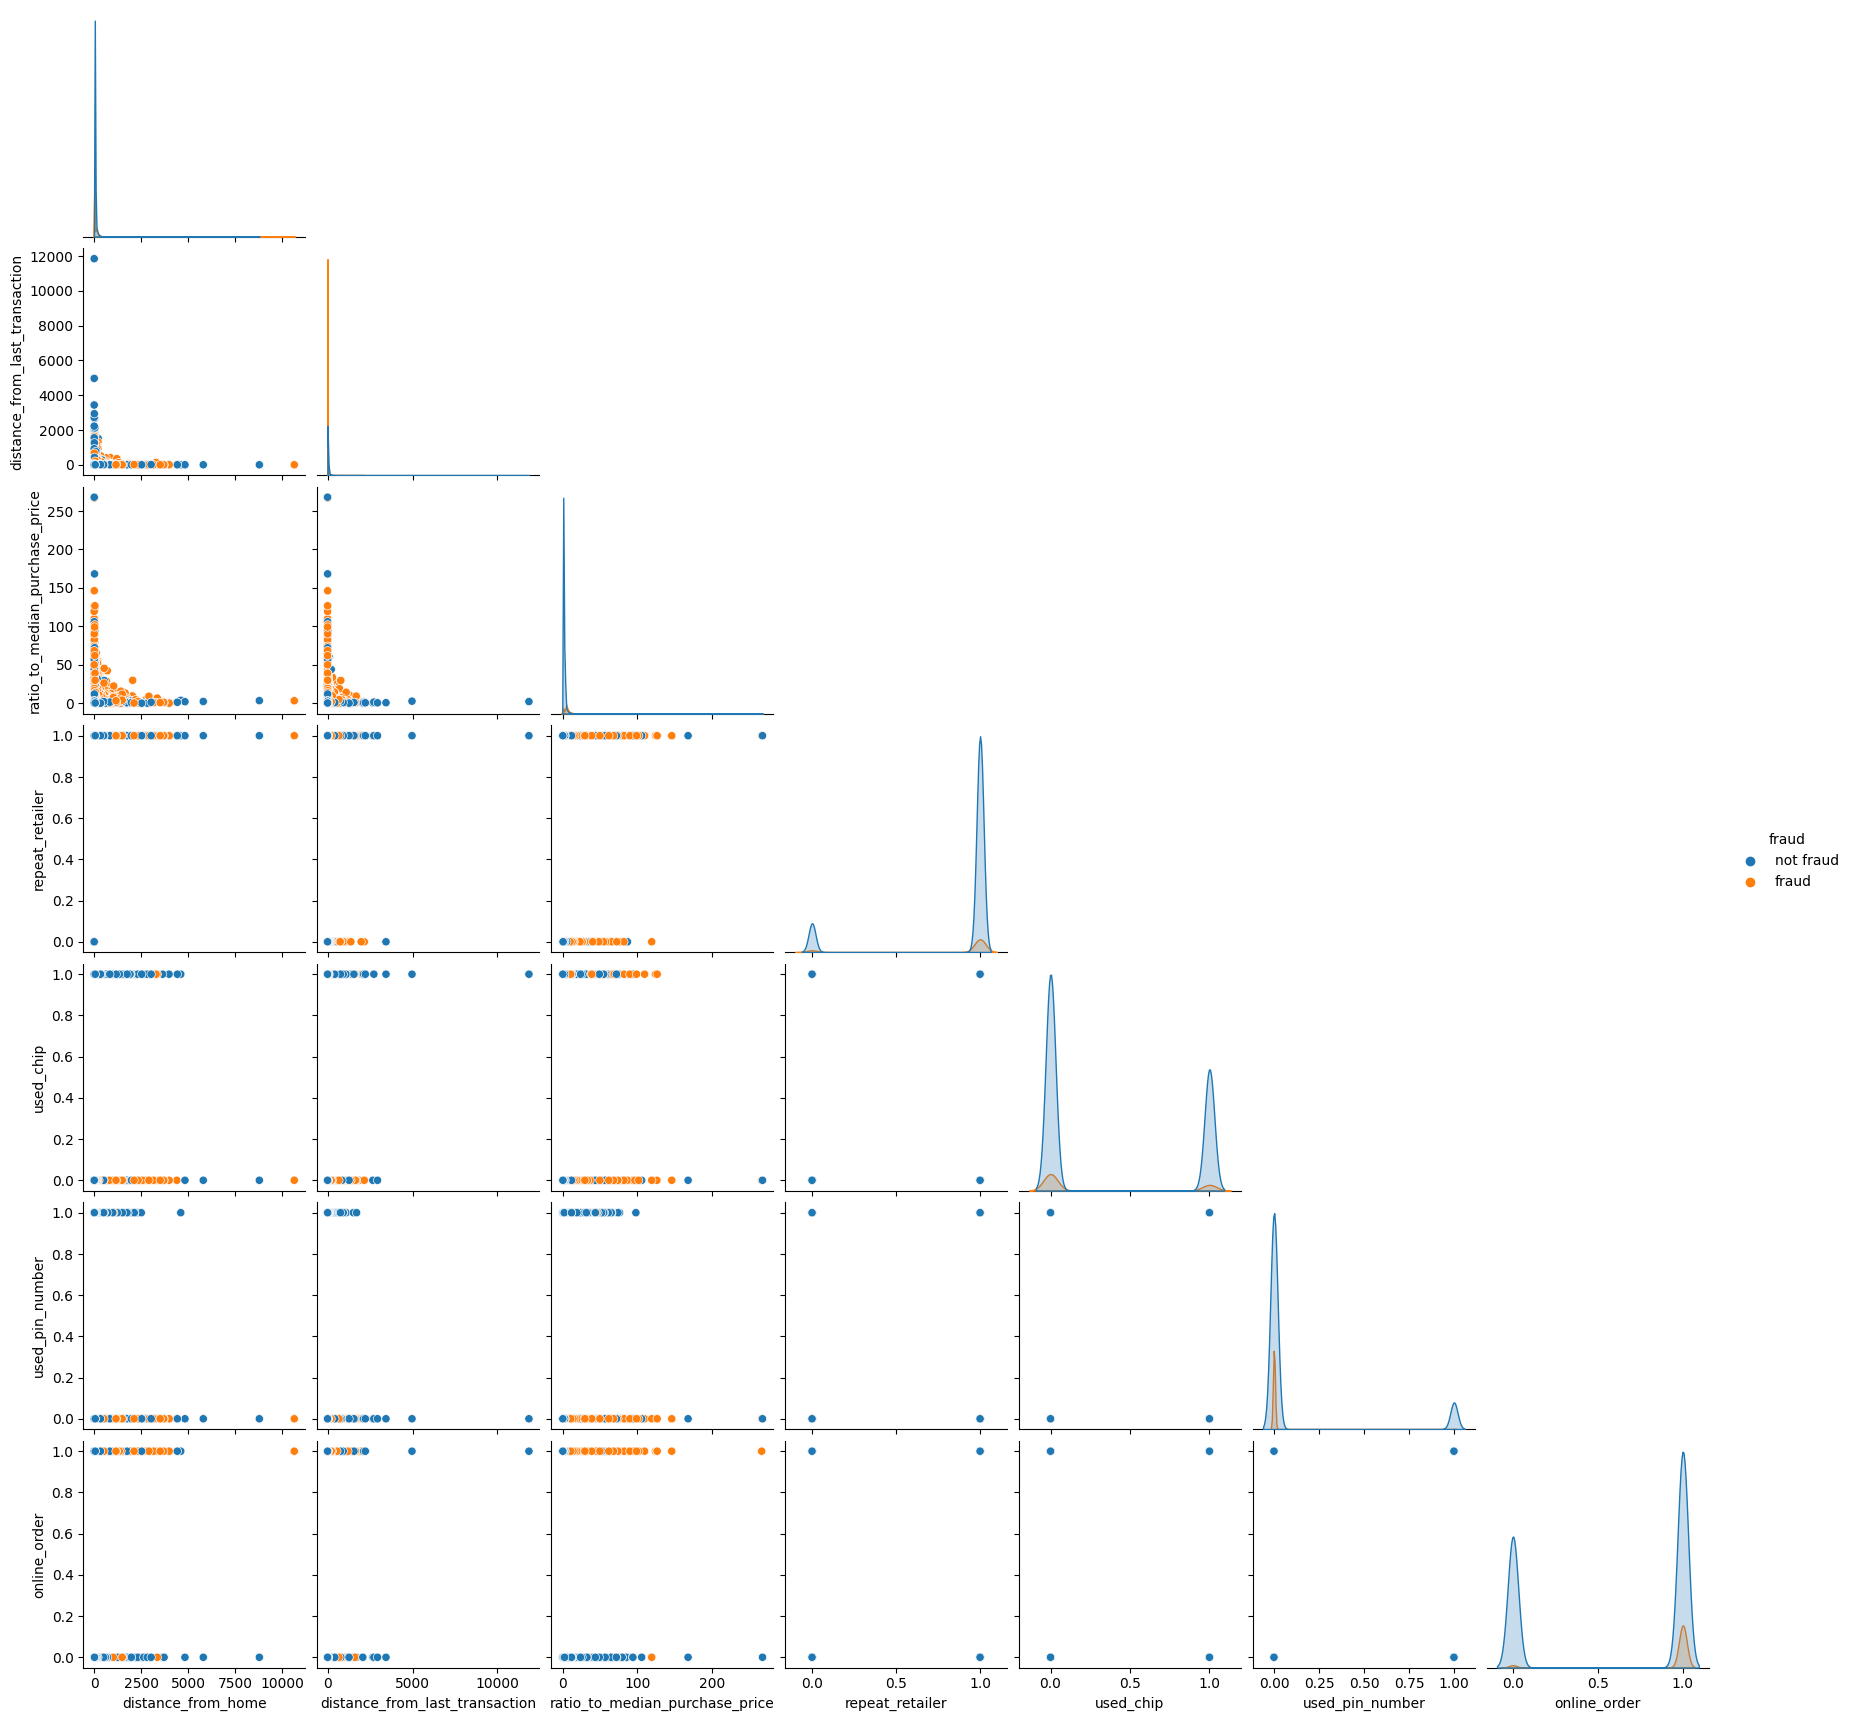

In [7]:

labeled_data = data
labeled_data["fraud"].replace({0:"not fraud", 1:"fraud"}, inplace=True)

sns.pairplot(labeled_data, hue="fraud", corner=True)

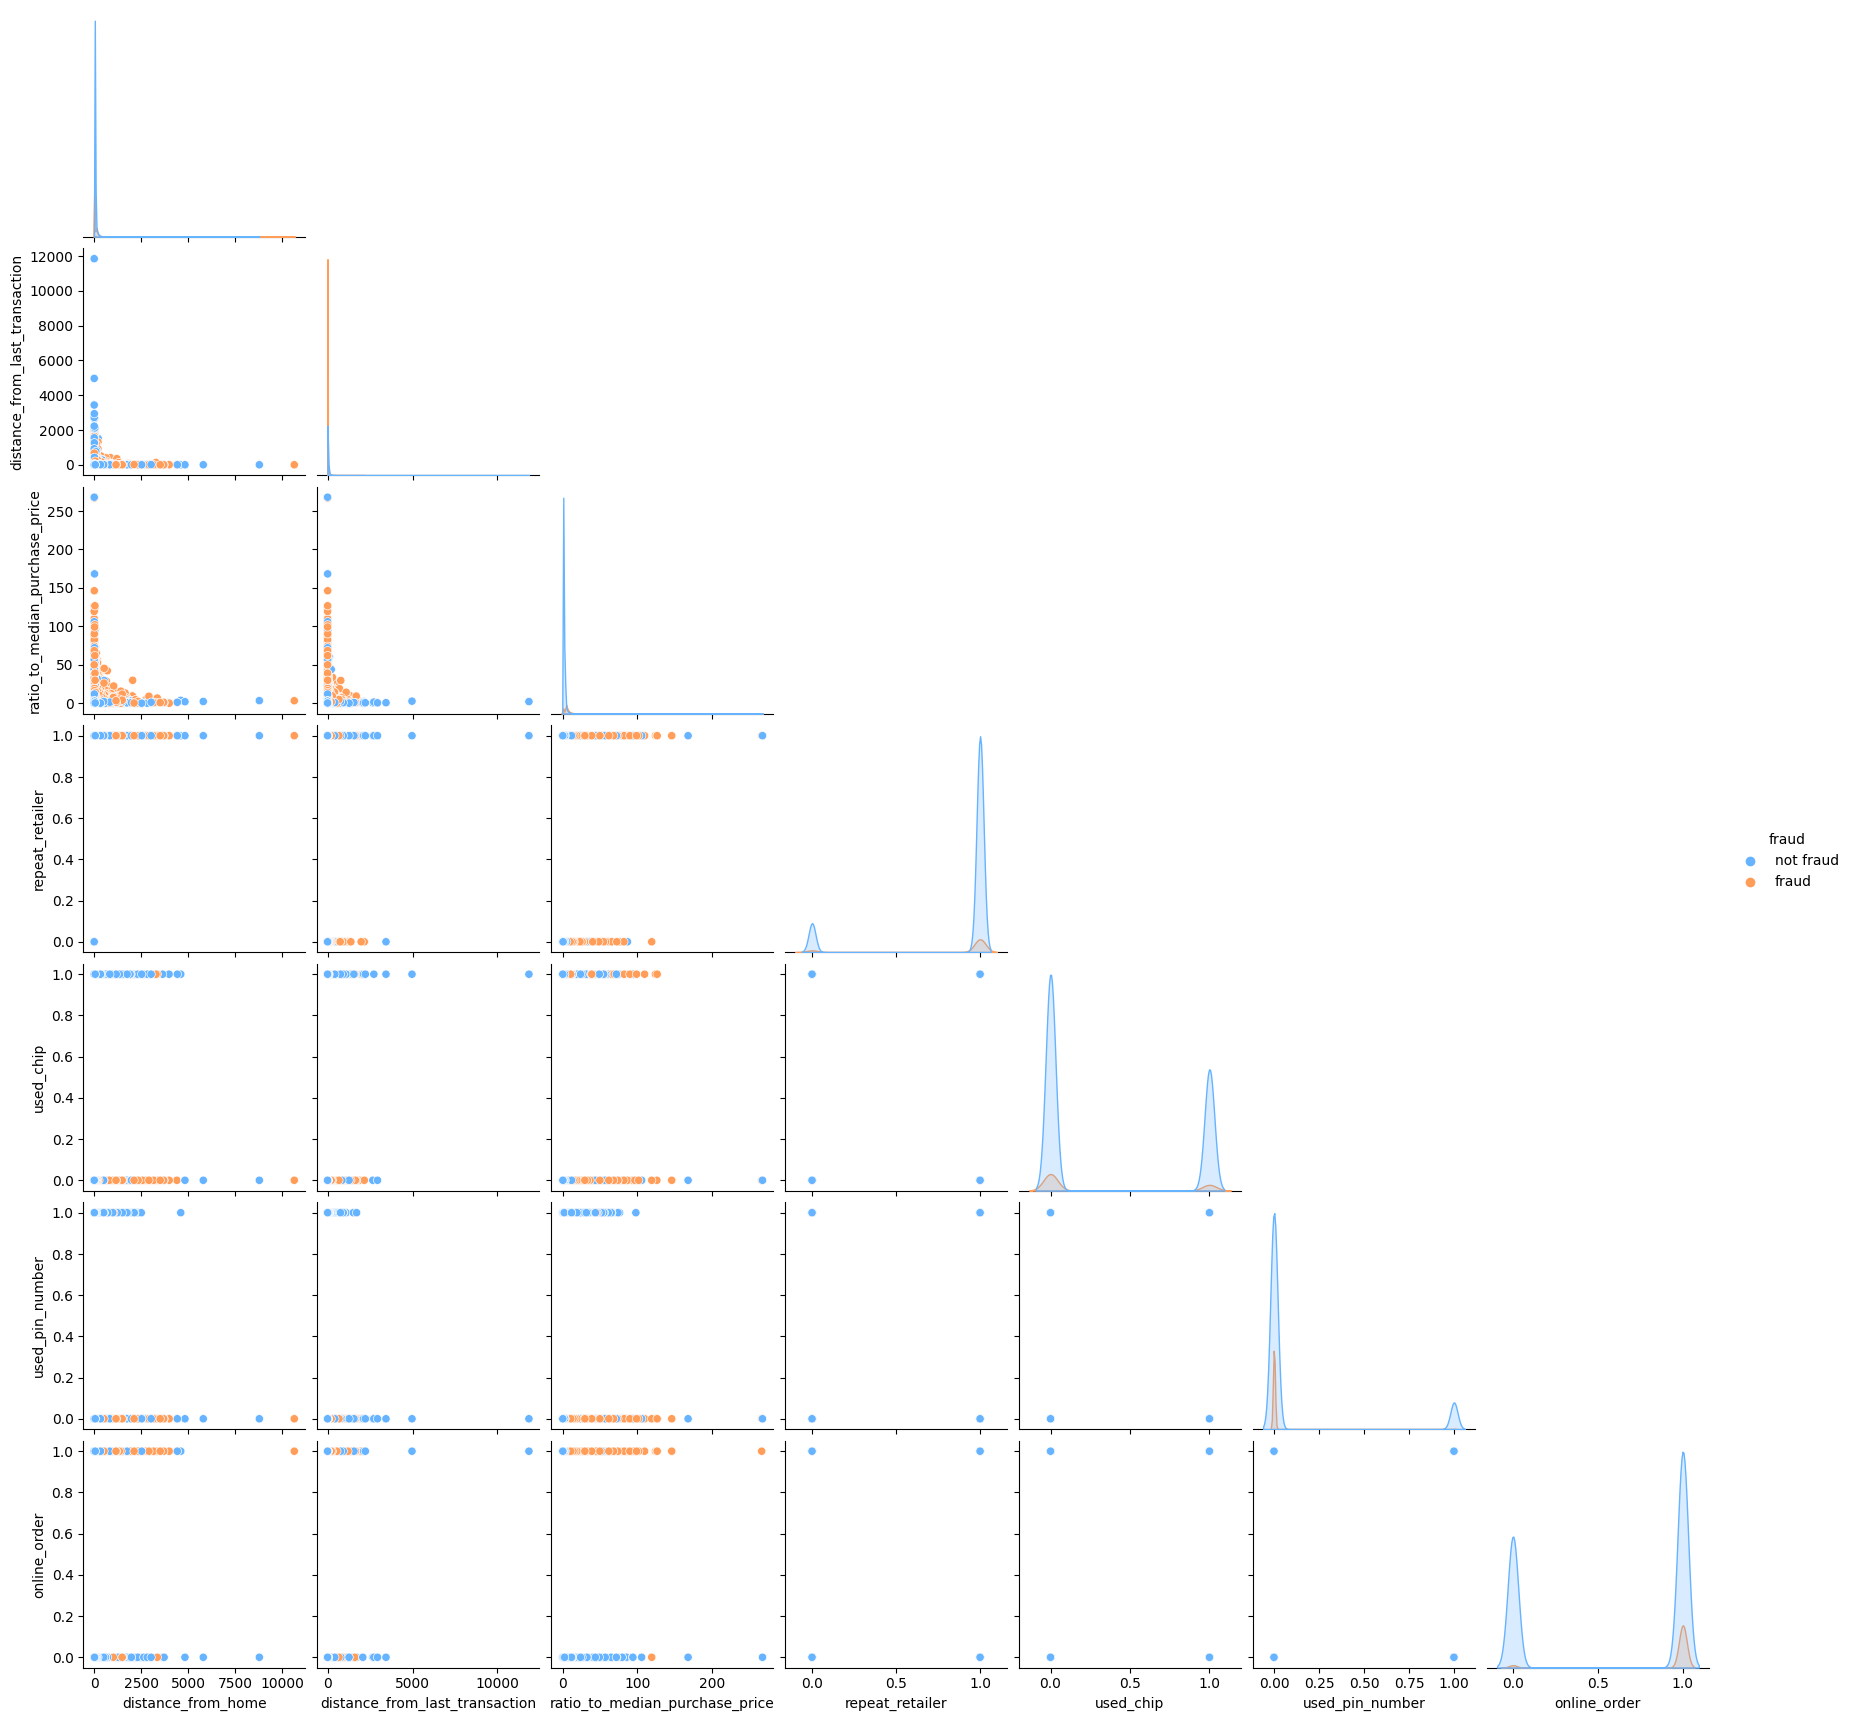

In [32]:
# PUT IT IN RELATION LATEX
labeled_data = data
labeled_data["fraud"].replace({0:"not fraud", 1:"fraud"}, inplace=True)

# sns.pairplot(labeled_data, hue="fraud", corner=True, palette=['#66b3ff','#ff9d59'])
sns.pairplot(labeled_data, hue="fraud", corner=True, palette=['#66b3ff','#ff9d59']) 

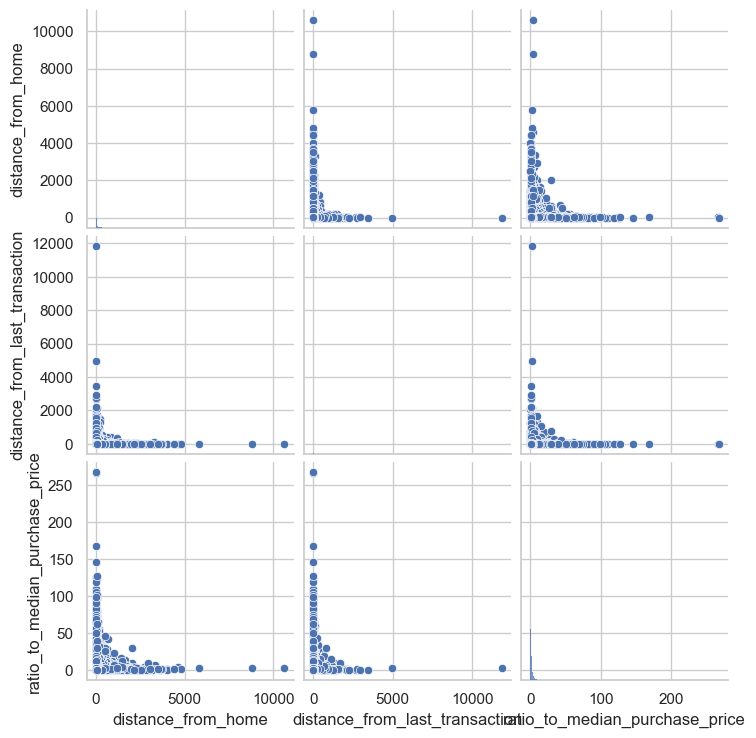

In [ ]:
sns.pairplot(data.drop(['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'fraud'], axis=1))

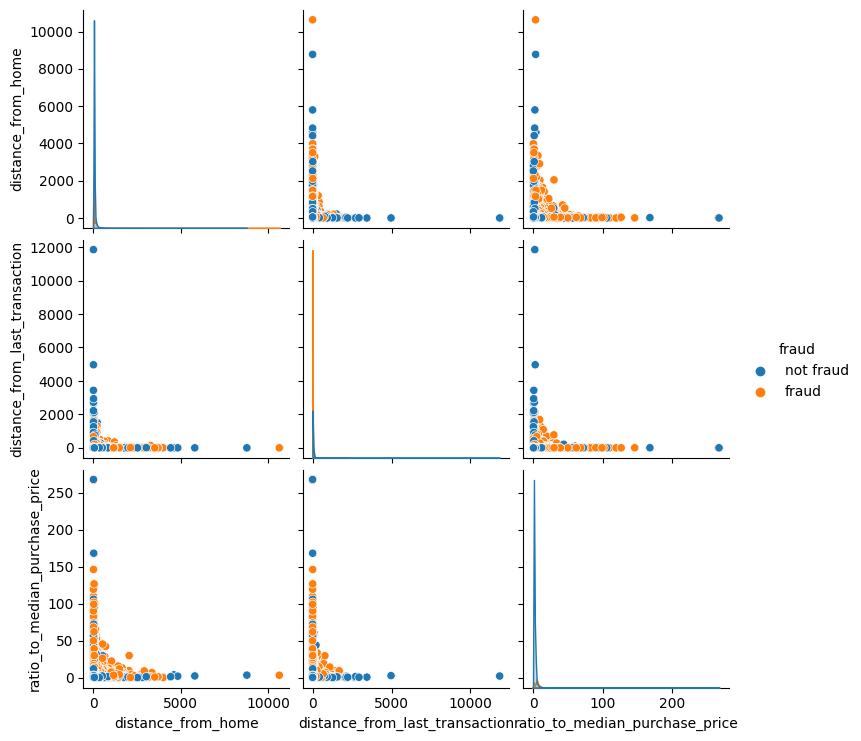

In [2]:
# high distance from home -> fraud
# high ratio -> fraud
# high distance from last transaction -> not fraud
labeled_data = data
labeled_data["fraud"].replace({0:"not fraud", 1:"fraud"}, inplace=True)
sns.pairplot(labeled_data.drop(['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'], axis=1), hue="fraud")

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,repeat,1,0,0,not fraud
1,10.829943,0.175592,1.294219,repeat,0,0,0,not fraud
2,5.091079,0.805153,0.427715,repeat,0,0,1,not fraud
3,2.247564,5.600044,0.362663,repeat,1,0,1,not fraud
4,44.190936,0.566486,2.222767,repeat,1,0,1,not fraud
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,repeat,1,0,0,not fraud
999996,19.872726,2.683904,2.778303,repeat,1,0,0,not fraud
999997,2.914857,1.472687,0.218075,repeat,1,0,1,not fraud
999998,4.258729,0.242023,0.475822,repeat,0,0,1,not fraud


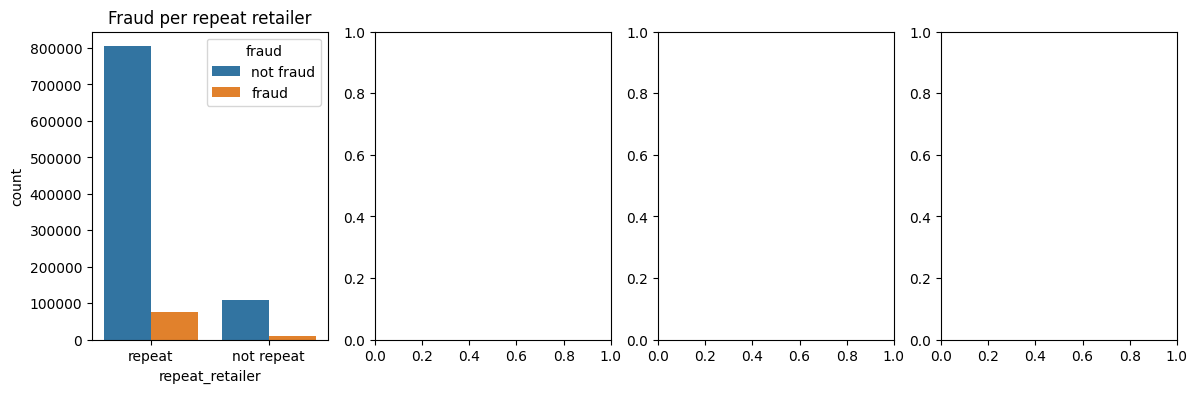

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(14, 4))

labeled_data = data
labeled_data["fraud"].replace({0:"not fraud", 1:"fraud"}, inplace=True)
labeled_data["repeat_retailer"].replace({0:"not repeat", 1:"repeat"}, inplace=True)

display(labeled_data)

# graphic to put in relation repeat retailer with fraud = 1
sns.countplot(data=labeled_data, x="repeat_retailer", hue="fraud", orient="v", palette=sns.color_palette(), ax=ax1)
ax1.set_title('Fraud per repeat retailer')
ax1.locator_params(axis='y', integer=True)

# -> event in the full pairplot we can see these information

# graphic to put in relation online order with fraud = 1 -> pariplot 
# graphic to put in relation chip used with fraud = 1 -> pariplot 
# graphic to put in relation pin used with fraud = 1 -> pariplot 


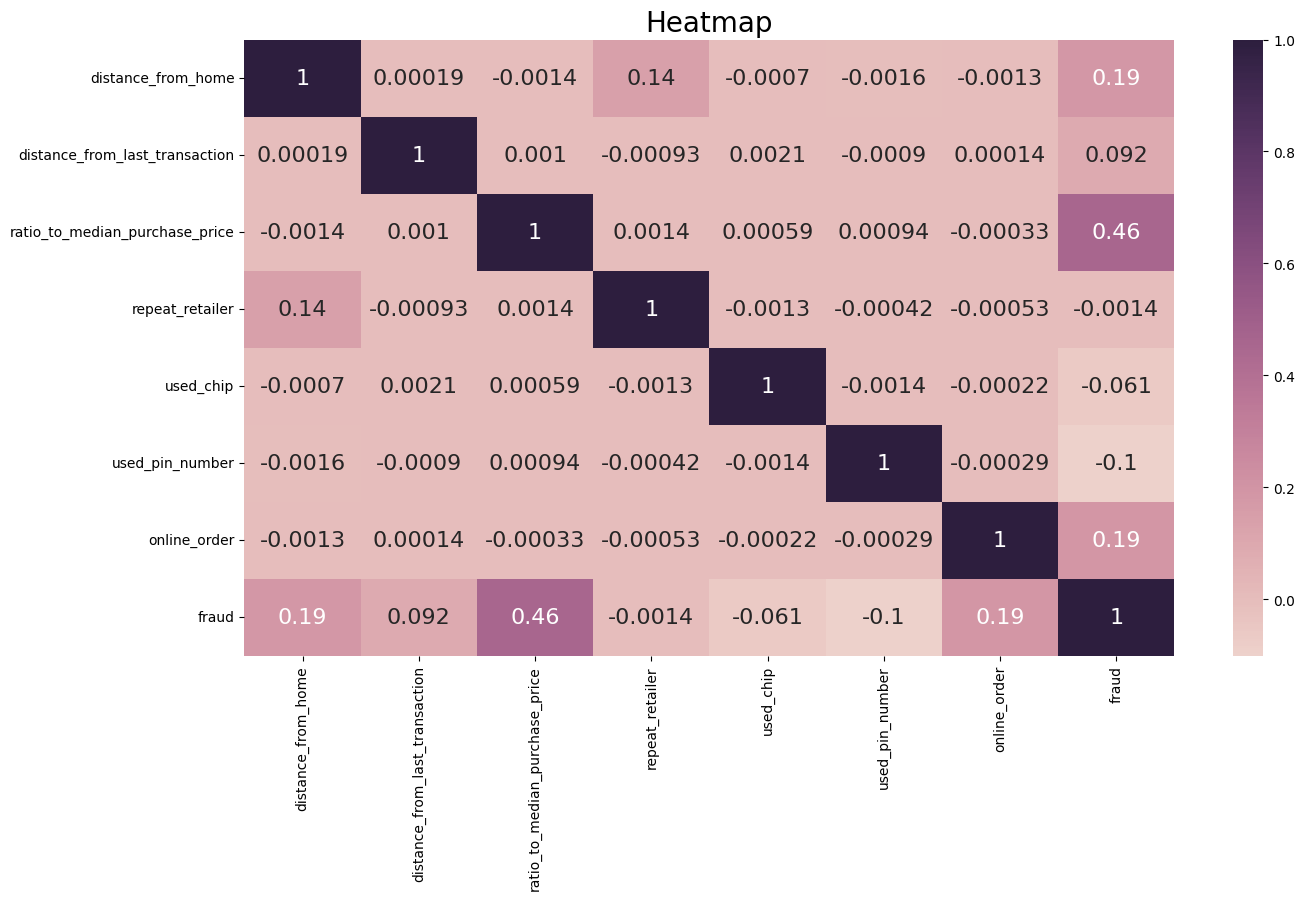

'plt.figure(figsize=(15,8))\nsns.heatmap(data.drop(["repeat_retailer", "fraud", "used_chip", "used_pin_number", "online_order"], axis=1).corr(), cmap="Blues", annot=True, annot_kws={"fontsize":16})\nplt.title("Heatmap", fontsize=20)\nplt.show() '

In [27]:
# PUT IN RELATION LATEX THE FIRST ONE
# color map / correlation
# if two variable are correlated don't put both in algorithm because one derive from the other
# -> there is no particular correlation between features
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, annot_kws={"fontsize":16})
plt.title("Heatmap", fontsize=20)
plt.show()
"""plt.figure(figsize=(15,8))
sns.heatmap(data.drop(["repeat_retailer", "fraud", "used_chip", "used_pin_number", "online_order"], axis=1).corr(), cmap="Blues", annot=True, annot_kws={"fontsize":16})
plt.title("Heatmap", fontsize=20)
plt.show() """


KeyboardInterrupt: 

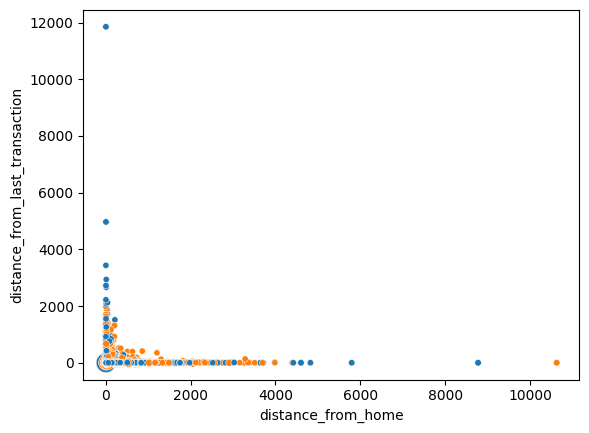

In [3]:
# bubble chart with avreage distance from home, last transaction and ration as dimensions and fraud as value (bubble dimension proportional to ratio) (as in qlik)
# as we saw in pairplot, distance from home impact more on fraud than distance from last transaction
# even ratio of transaction import and import mean impact enough on probability to be a fraud transaction 

#-> in qlik it's clear, but at the end same consideratons we can do from pairplot

sns.scatterplot(
    data=data.drop(["repeat_retailer","used_chip","used_pin_number","online_order"],axis=1), x="distance_from_home", y="distance_from_last_transaction", hue="fraud", size="ratio_to_median_purchase_price",
    sizes=(20, 200), legend="full"
)

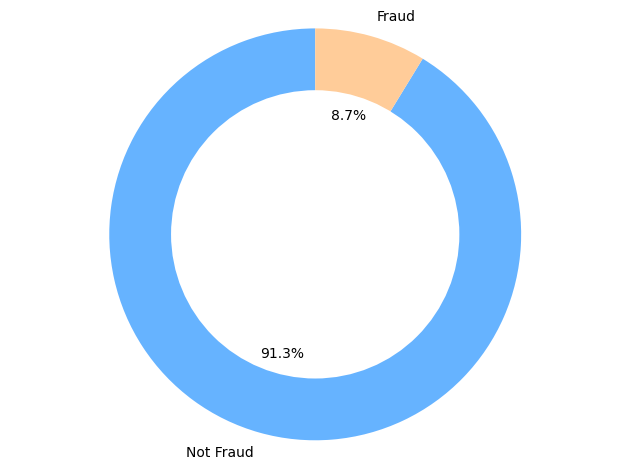